# Assignment 1 - Evolutionary Computation

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import math
from deap import base, creator, gp, tools, algorithms

## Seed

In [2]:
np.random.seed(0)

## Load Data

In [3]:
tsp_problem = np.loadtxt("file-tsp.txt")

## Exercise 4 - Role of Selection in GA's

In [6]:
def inverse(x):
    return 1 if x == 0 else 0

In [7]:
def counting_ones(l, p, iterations):
    x = np.random.choice([0, 1], size=(l))
    fitness = []

    iteration = 0
    while((iteration < iterations) & (np.sum(x) < l)):
        x_m = [inverse(x_i) if (np.random.random() < p) else x_i for x_i in x]
        
        if((l - np.sum(x_m)) < (l - np.sum(x))):
            x = x_m
            
        fitness.append((l - np.sum(x)))
        iteration += 1
            
    return fitness

In [8]:
def plot_fitness(ax, fitness, iterations):
    ax.plot(fitness)
    ax.set_ylim(0, np.max(fitness))
    ax.set_xlim(0, iterations)
    ax.set_xticks(np.arange(0, iterations+1, 300))
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Fitness")

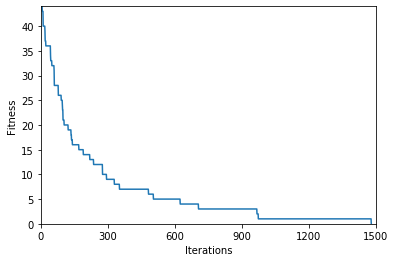

In [9]:
l = 100 
p = 1/l
iterations = 1500

fitness = counting_ones(l, p, iterations)
fig, axs = plt.subplots()
plot_fitness(axs, fitness, iterations)

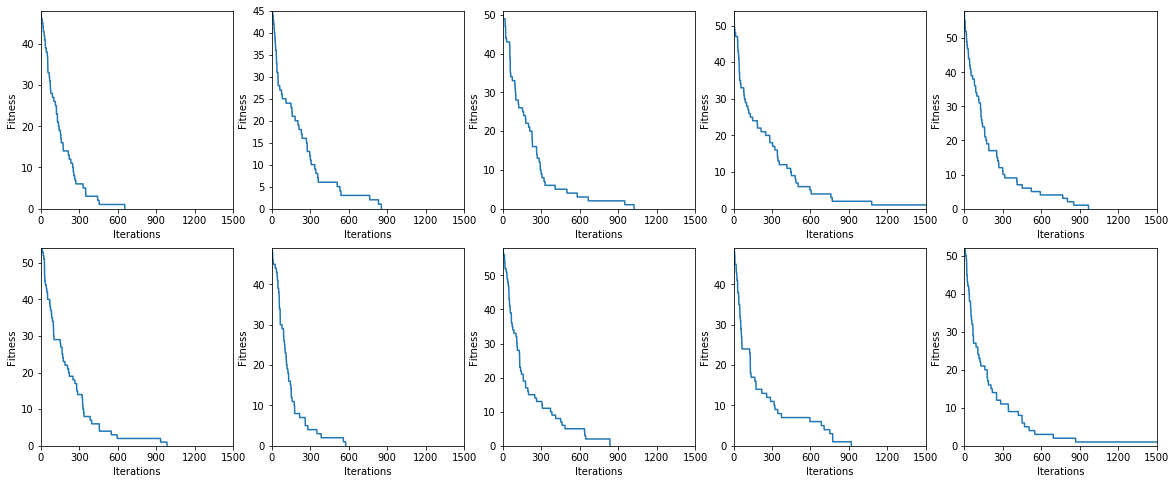

In [10]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

for ax in axs:
    fitness = counting_ones(l, p, iterations)
    plot_fitness(ax, fitness, iterations)

In [11]:
# This count ones function is the modified version

def counting_ones(l, p, iterations):
    x = np.random.choice([0, 1], size=(l))
    fitness = []

    iteration = 0
    while((iteration < iterations) & (np.sum(x) < l)):
        x_m = [inverse(x_i) if (np.random.random() < p) else x_i for x_i in x]
        x = x_m
            
        fitness.append((l - np.sum(x)))
        iteration += 1
            
    return fitness

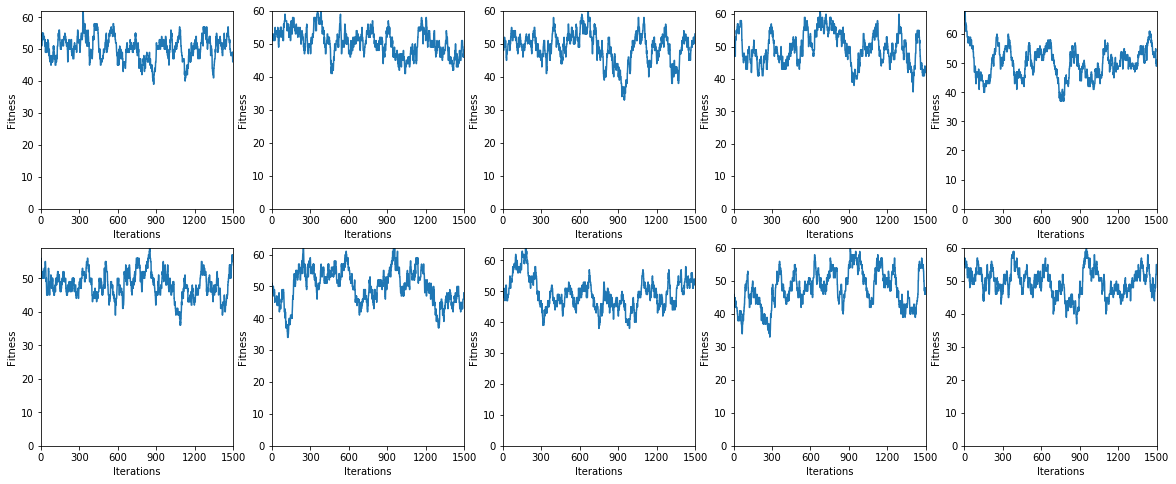

In [12]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.ravel()

for ax in axs:
    fitness = counting_ones(l, p, iterations)
    plot_fitness(ax, fitness, iterations)

## Exercise 6 - Mementic Algorithms vs Simple EAs

## Exercise 8 - Genetic Programming Behaviour

In [24]:
# The data we want to fit on
data = [[-1.0, 0.0000],
        [-0.9, -0.1629],
        [-0.8, -0.2624],
        [-0.7, -0.3129],
        [-0.6, -0.3264],
        [-0.5, -0.3125],
        [-0.4, -0.2784],
        [-0.3, -0.2289],
        [-0.2, -0.1664],
        [-0.1, -0.0909],
        [0, 0.0],
        [0.1, 0.1111],
        [0.2, 0.2496],
        [0.3, 0.4251],
        [0.4, 0.6496],
        [0.5, 0.9375],
        [0.6, 1.3056],
        [0.7, 1.7731],
        [0.8, 2.3616],
        [0.9, 3.0951],
        [1.0, 4.0000]]

In [25]:
# Implemented a GP program based on this tutorial: https://deap.readthedocs.io/en/master/examples/gp_symbreg.html
pset = gp.PrimitiveSet("main", 1)
pset.renameArguments(ARG0="x")

In [26]:
# Primitives
def div(x, y):
    return x/y if (y > 0) else 0

def log(x):
    return math.log(x) if (x > 0) else 0

def exp(x):
    return math.exp(min(x,100))

pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(div, 2)
pset.addPrimitive(log, 1)
pset.addPrimitive(exp, 1)
pset.addPrimitive(math.sin, 1)
pset.addPrimitive(math.cos, 1)

In [27]:
# We want to maximize the fitness function
creator.create("FitnessMin", base.Fitness, weights=(1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [28]:
# Fitness function
def absolute_error_sum(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)
    
    # Sum of absolute errors
    error = np.sum([abs(func(x[0]) - x[1]) for x in points])    

    # Return -sum of absolute errors
    return -error,

In [29]:
### Toolbox
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=3)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", absolute_error_sum, points=data)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [30]:
# Statistics
def min_(x):
    if type(x[0]) is list:
        x = np.asarray(x)
        return np.min(x[:,0])
    else:
        return np.min(x)
    
def max_(x):
    if type(x[0]) is list:
        x = np.asarray(x)
        return np.max(x[:,0])
    else:
        return np.max(x)
    
def avg_(x):
    if type(x[0]) is list:
        x = np.asarray(x)
        return np.mean(x[:,0])
    else:
        return np.mean(x)
    
def std_(x):
    if type(x[0]) is list:
        x = np.asarray(x)
        return np.std(x[:,0])
    else:
        return np.std(x)
    
def best_(x):
    if type(x[0]) is list:
        x = np.asarray(x)
        return x[np.argmax(x[:,1])][0]
    else:
        return np.max(x)
    
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(lambda ind: [len(ind), ind.fitness.values[0]])
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", avg_)
mstats.register("std", std_)
mstats.register("min", min_)
mstats.register("max", max_)
mstats.register("best", best_)

In [31]:
# Evolution
pop = toolbox.population(n=1000)
hof = tools.HallOfFame(1)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0, ngen=50, stats=mstats,
                               halloffame=hof, verbose=True)

   	      	                              fitness                              	                          size                         
   	      	-------------------------------------------------------------------	-------------------------------------------------------
gen	nevals	avg    	best   	gen	max    	min         	nevals	std        	avg  	best	gen	max	min	nevals	std    
0  	1000  	-493132	-5.2503	0  	-5.2503	-4.85188e+08	1000  	1.53361e+07	4.803	5   	0  	15 	2  	1000  	2.82103
1  	722   	-16.4255	-4.24698	1  	-4.24698	-285.647    	722   	11.0057    	4.276	6   	1  	15 	2  	722   	2.5183 
2  	704   	-13.3762	-3.87637	2  	-3.87637	-57.5702    	704   	4.22843    	4.138	12  	2  	15 	2  	704   	2.42342
3  	688   	-12.4555	-3.07986	3  	-3.07986	-92.5058    	688   	5.51405    	4.578	12  	3  	15 	2  	688   	2.34476
4  	668   	-12.1402	-3.07986	4  	-3.07986	-246.329    	668   	11.4459    	5.614	12  	4  	16 	2  	668   	2.55988
5  	688   	-6.37713e+07	-3.07986	5  	-3.07986	-6.37713e+10	688  

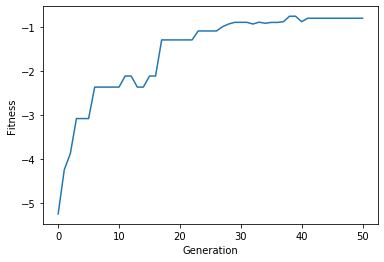

In [32]:
# Plot fitness of best individual of each generation
best_fitness = log.chapters["fitness"].select("best")
plt.plot(best_fitness)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [33]:
# Plot size 
min_size = log.chapters["size"].select("min")
max_size = log.chapters["size"].select("max")
avg_size = log.chapters["size"].select("avg")
best_size = log.chapters["size"].select("best")

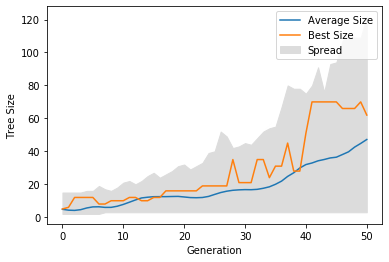

In [34]:
plt.plot(avg_size, label="Average Size")
plt.plot(best_size, label="Best Size")
plt.fill_between(np.arange(0,51), min_size, max_size, color="gainsboro", label="Spread")
plt.xlabel("Generation")
plt.ylabel("Tree Size")
plt.legend()
plt.show()